<a href="https://colab.research.google.com/github/Javsk891/Crosstabulation_and_Sorting/blob/main/TransplantesRobles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Transplantes.xlsx')
df.head()

,PERIODO,INSTITUCION,GESTION,SEXO,EDAD,CONSENTIMIENTO,CUALQUIER_ORGANO,CUALES_NO,TRASPLANTE,INVESTIGACION,BARRIO,COMUNA,ID2
0,2012,CENTRO MEDICO INTEGRAL FITZ ROY,PRIVADA,F,40,SI,SI,NaN,SI,SI,VILLA CRESPO,15,1
1,2012,CLINICA BAZTERRICA,PRIVADA,M,31,SI,SI,NaN,SI,NO,RECOLETA,2,2
2,2012,CLINICA BAZTERRICA,PRIVADA,F,41,SI,SI,NaN,SI,SI,RECOLETA,2,3
3,2012,CLINICA DE LOS VIRREYES,PRIVADA,M,29,SI,SI,NaN,SI,NO,COLEGIALES,13,4
4,2012,CLINICA DE LOS VIRREYES,PRIVADA,F,26,SI,SI,NaN,SI,NO,COLEGIALES,13,5


In [ ]:
df.shape

(791, 13)

In [ ]:
df.count()

PERIODO             791
INSTITUCION         791
GESTION             791
SEXO                791
EDAD                791
CONSENTIMIENTO      791
CUALQUIER_ORGANO    791
CUALES_NO            17
TRASPLANTE          791
INVESTIGACION       791
BARRIO              791
COMUNA              791
ID2                 791
dtype: int64

In [ ]:
df.dtypes

PERIODO              int64
INSTITUCION         object
GESTION             object
SEXO                object
EDAD                 int64
CONSENTIMIENTO      object
CUALQUIER_ORGANO    object
CUALES_NO           object
TRASPLANTE          object
INVESTIGACION       object
BARRIO              object
COMUNA               int64
ID2                  int64
dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
print(df.columns)

Index(['PERIODO', 'INSTITUCION', 'GESTION', 'SEXO', 'EDAD', 'CONSENTIMIENTO',
       'CUALQUIER_ORGANO', 'CUALES_NO', 'TRASPLANTE', 'INVESTIGACION',
       'BARRIO', 'COMUNA', 'ID2'],
      dtype='object')


<AxesSubplot:>

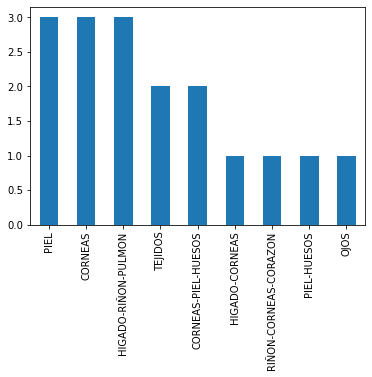

In [ ]:
df['CUALES_NO'].value_counts().plot.bar()

<AxesSubplot:>

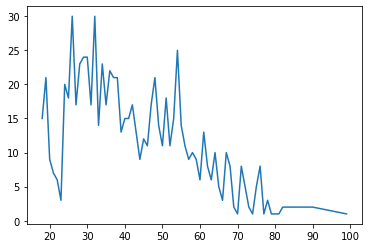

In [ ]:
df['EDAD'].value_counts().sort_index().plot.line()

<AxesSubplot:ylabel='Frequency'>

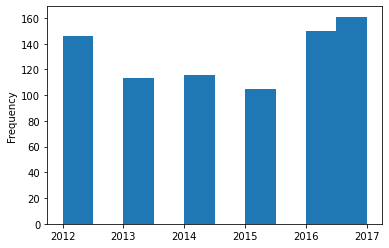

In [ ]:
df['PERIODO'].plot.hist()

In [ ]:
frec = df['INSTITUCION'].value_counts()
frec

HOSPITAL ITALIANO DE BUENOS AIRES                      100
HOSPITAL FRANCISCO SANTOJANNI                           57
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ         53
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH           42
HOSPITAL BRITANICO DE BUENOS AIRES                      41
                                                      ... 
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES                 1
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI      1
CLIMEDICA                                                1
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA          1
FUNDACION HOSPITALARIA                                   1
Name: INSTITUCION, Length: 75, dtype: int64

In [ ]:
frec_df = pd.DataFrame(frec)
frec_df

,INSTITUCION
HOSPITAL ITALIANO DE BUENOS AIRES,100
HOSPITAL FRANCISCO SANTOJANNI,57
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ,53
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH,42
HOSPITAL BRITANICO DE BUENOS AIRES,41
...,...
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES,1
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI,1
CLIMEDICA,1
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA,1


In [ ]:
frec_df.rename(columns={'INSTITUCION':'frec_abs'}, inplace = True)
frec_df

,frec_abs
HOSPITAL ITALIANO DE BUENOS AIRES,100
HOSPITAL FRANCISCO SANTOJANNI,57
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ,53
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH,42
HOSPITAL BRITANICO DE BUENOS AIRES,41
...,...
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES,1
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI,1
CLIMEDICA,1
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA,1


In [ ]:
frec_abs_val = frec_df['frec_abs'].values

acum = []

valor_acum = 0

for i in frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df['frec_abs_acum'] = acum
frec_df

,frec_abs,frec_abs_acum
HOSPITAL ITALIANO DE BUENOS AIRES,100,100
HOSPITAL FRANCISCO SANTOJANNI,57,157
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ,53,210
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH,42,252
HOSPITAL BRITANICO DE BUENOS AIRES,41,293
...,...,...
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES,1,787
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI,1,788
CLIMEDICA,1,789
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA,1,790


In [ ]:
frec_df['frec_rel_%'] = 100 * frec_df['frec_abs']/len(df.INSTITUCION)
frec_df

,frec_abs,frec_abs_acum,frec_rel_%
HOSPITAL ITALIANO DE BUENOS AIRES,100,100,12.642225
HOSPITAL FRANCISCO SANTOJANNI,57,157,7.206068
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ,53,210,6.700379
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH,42,252,5.309735
HOSPITAL BRITANICO DE BUENOS AIRES,41,293,5.183312
...,...,...,...
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES,1,787,0.126422
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI,1,788,0.126422
CLIMEDICA,1,789,0.126422
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA,1,790,0.126422


In [ ]:
frec_rel_val = frec_df['frec_rel_%'].values

acum = []

valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df['frec_rel_%_acum'] = acum
frec_df

,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
HOSPITAL ITALIANO DE BUENOS AIRES,100,100,12.642225,12.642225
HOSPITAL FRANCISCO SANTOJANNI,57,157,7.206068,19.848293
HOSPITAL GENERAL DE AGUDOS DR. JUAN A FERNANDEZ,53,210,6.700379,26.548673
HOSPITAL GENERAL DE AGUDOS DR. COSME ARGERICH,42,252,5.309735,31.858407
HOSPITAL BRITANICO DE BUENOS AIRES,41,293,5.183312,37.041719
...,...,...,...,...
INSTITUTO CARDIOVASCULAR DE BUENOS AIRES,1,787,0.126422,99.494311
INSTITUTO DE INVESTIGACIONES MEDICAS ALFREDO LANARI,1,788,0.126422,99.620733
CLIMEDICA,1,789,0.126422,99.747155
HOSPITAL GENERAL DE AGUDOS DR. ABEL ZUBIZARRETA,1,790,0.126422,99.873578
